# ***Data Loading and Cleaning***

In [1]:
import pandas as pd

# Load datasets
user_data = pd.read_csv('D:\\Projects\\Guvi_Project4\\Datasets\\user_data.csv')  # User visit history
attraction_data = pd.read_csv('D:\\Projects\\Guvi_Project4\\Datasets\\attraction_type.csv')  # Attraction features
visit_data = pd.read_csv('D:\\Projects\\Guvi_Project4\\Datasets\\visit_mode.csv')  # User visit counts
transaction_data = pd.read_csv('D:\\Projects\\Guvi_Project4\\Datasets\\transaction_data.csv')  # User transactions
region_data = pd.read_csv('D:\\Projects\\Guvi_Project4\\Datasets\\region_data.csv')  # Region information
item_data = pd.read_csv('D:\\Projects\\Guvi_Project4\\Datasets\\item_data.csv')  # Item features
country_data = pd.read_csv('D:\\Projects\\Guvi_Project4\\Datasets\\country_data.csv')  # Country information
continent_data = pd.read_csv('D:\\Projects\\Guvi_Project4\\Datasets\\continent_data.csv')  # Continent information
city_data = pd.read_csv('D:\\Projects\\Guvi_Project4\\Datasets\\city_data.csv')  # City information

print("Data loaded successfully!")
print("User data shape:", user_data.shape)
print("Attraction data shape:", attraction_data.shape)   
print("Visit data shape:", visit_data.shape)
print("Transaction data shape:", transaction_data.shape)
print("Region data shape:", region_data.shape)
print("Item data shape:", item_data.shape)
print("Country data shape:", country_data.shape)
print("Continent data shape:", continent_data.shape)
print("City data shape:", city_data.shape)


Data loaded successfully!
User data shape: (33530, 5)
Attraction data shape: (17, 2)
Visit data shape: (6, 2)
Transaction data shape: (52930, 7)
Region data shape: (22, 3)
Item data shape: (30, 5)
Country data shape: (165, 3)
Continent data shape: (6, 2)
City data shape: (9143, 3)


In [2]:
print("Columns in our Dataset")
print("User data columns:", user_data.columns)
print("Attraction data columns:", attraction_data.columns)
print("Visit data columns:", visit_data.columns) 
print("Transaction data columns:", transaction_data.columns)
print("Region data columns:", region_data.columns)
print("Item data columns:", item_data.columns)
print("Country data columns:", country_data.columns) 
print("Continent data columns:", continent_data.columns)
print("City data columns:", city_data.columns)


Columns in our Dataset
User data columns: Index(['UserId', 'ContinentId', 'RegionId', 'CountryId', 'CityId'], dtype='object')
Attraction data columns: Index(['AttractionTypeId', 'AttractionType'], dtype='object')
Visit data columns: Index(['VisitModeId', 'VisitMode'], dtype='object')
Transaction data columns: Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitMode',
       'AttractionId', 'Rating'],
      dtype='object')
Region data columns: Index(['Region', 'RegionId', 'ContinentId'], dtype='object')
Item data columns: Index(['AttractionId', 'AttractionCityId', 'AttractionTypeId', 'Attraction',
       'AttractionAddress'],
      dtype='object')
Country data columns: Index(['CountryId', 'Country', 'RegionId'], dtype='object')
Continent data columns: Index(['ContinentId', 'Continent'], dtype='object')
City data columns: Index(['CityId', 'CityName', 'CountryId'], dtype='object')


In [3]:
# Check for missing values in 'User' data
print(user_data.isnull().sum())
# Check for missing values in 'Attraction' data
print(attraction_data.isnull().sum())
# Check for missing values in 'Visit' data
print(visit_data.isnull().sum())
# Check for missing values in 'Transaction' data
print(transaction_data.isnull().sum())
# Check for missing values in 'Region' data
print(region_data.isnull().sum())
# Check for missing values in 'Item' data
print(item_data.isnull().sum())
# Check for missing values in 'Country' data
print(country_data.isnull().sum())
# Check for missing values in 'Continent' data
print(continent_data.isnull().sum())
# Check for missing values in 'City' data
print(city_data.isnull().sum())


UserId         0
ContinentId    0
RegionId       0
CountryId      0
CityId         4
dtype: int64
AttractionTypeId    0
AttractionType      0
dtype: int64
VisitModeId    0
VisitMode      0
dtype: int64
TransactionId    0
UserId           0
VisitYear        0
VisitMonth       0
VisitMode        0
AttractionId     0
Rating           0
dtype: int64
Region         0
RegionId       0
ContinentId    0
dtype: int64
AttractionId         0
AttractionCityId     0
AttractionTypeId     0
Attraction           0
AttractionAddress    0
dtype: int64
CountryId    0
Country      0
RegionId     0
dtype: int64
ContinentId    0
Continent      0
dtype: int64
CityId       0
CityName     1
CountryId    0
dtype: int64


# ***1. Handling Missing Values***

a. User Dataset


In [4]:
# Before handling
print("Missing values in user data before cleaning:")
print(user_data.isna().sum())

Missing values in user data before cleaning:
UserId         0
ContinentId    0
RegionId       0
CountryId      0
CityId         4
dtype: int64


In [5]:
# Drop rows with missing CityId (only 4 out of 33,530)
user_data.dropna(subset=['CityId'], inplace=True)

In [6]:
# Verify
print("\nMissing values in user data after cleaning:")
print(user_data.isna().sum())
print(f"User data shape after cleaning: {user_data.shape}")


Missing values in user data after cleaning:
UserId         0
ContinentId    0
RegionId       0
CountryId      0
CityId         0
dtype: int64
User data shape after cleaning: (33526, 5)


b. City Dataset

In [7]:
# Before handling
print("Missing values in city data before cleaning:")
print(city_data.isna().sum())

Missing values in city data before cleaning:
CityId       0
CityName     1
CountryId    0
dtype: int64


In [8]:
# Drop the row with missing CityName
city_data.dropna(subset=['CityName'], inplace=True)

In [9]:
# Verify
print("Missing values in city data after cleaning:")
print(city_data.isna().sum())
print(f"City data shape after cleaning: {city_data.shape}")

Missing values in city data after cleaning:
CityId       0
CityName     0
CountryId    0
dtype: int64
City data shape after cleaning: (9142, 3)


# ***2. Standardizing Categorical Variables***

a. VisitMode


In [10]:
# Before standardization
print("\nVisitMode values before standardization:")
print(visit_data['VisitMode'].value_counts())


VisitMode values before standardization:
VisitMode
-           1
Business    1
Couples     1
Family      1
Friends     1
Solo        1
Name: count, dtype: int64


In [11]:
# Standardize (strip whitespace and capitalize first letters)
visit_data['VisitMode'] = visit_data['VisitMode'].str.strip().str.title()

In [12]:
# Verify
print("\nVisitMode values after standardization:")
print(visit_data['VisitMode'].value_counts())


VisitMode values after standardization:
VisitMode
-           1
Business    1
Couples     1
Family      1
Friends     1
Solo        1
Name: count, dtype: int64


b. AttractionType


In [13]:
# Before standardization
print("\nAttractionType values before standardization:")
print(attraction_data['AttractionType'].value_counts())


AttractionType values before standardization:
AttractionType
Ancient Ruins                     1
Ballets                           1
Beaches                           1
Caverns & Caves                   1
Flea & Street Markets             1
Historic Sites                    1
History Museums                   1
National Parks                    1
Nature & Wildlife Areas           1
Neighborhoods                     1
Points of Interest & Landmarks    1
Religious Sites                   1
Spas                              1
Speciality Museums                1
Volcanos                          1
Water Parks                       1
Waterfalls                        1
Name: count, dtype: int64


In [14]:
# Standardize
attraction_data['AttractionType'] = attraction_data['AttractionType'].str.strip().str.title()

In [15]:
# Verify
print("\nAttractionType values after standardization:")
print(attraction_data['AttractionType'].value_counts())


AttractionType values after standardization:
AttractionType
Ancient Ruins                     1
Ballets                           1
Beaches                           1
Caverns & Caves                   1
Flea & Street Markets             1
Historic Sites                    1
History Museums                   1
National Parks                    1
Nature & Wildlife Areas           1
Neighborhoods                     1
Points Of Interest & Landmarks    1
Religious Sites                   1
Spas                              1
Speciality Museums                1
Volcanos                          1
Water Parks                       1
Waterfalls                        1
Name: count, dtype: int64


c. City Names


In [16]:
# Unique city names
print(city_data['CityName'].unique())

['-' 'Douala' 'South Region' ... 'Yeovil' 'Yorkshire' 'Sanaa']


In [17]:
# Create mapping for known discrepancies
city_name_mapping = {
    'New York City': 'New York',
    'NYC': 'New York',
    'San Fran': 'San Francisco',
    'S.F.': 'San Francisco',
    # Add more as needed
    '-': None,  # Replace missing values with None (can be dropped later if needed)
    'Los Ang': 'Los Angeles',
    'L.A.': 'Los Angeles',
    'Chicago, Il': 'Chicago',
    'Chi-Town': 'Chicago',
    'Vegas': 'Las Vegas',
    'D.C.': 'Washington DC',
    'Wash D.C.': 'Washington DC',
    'Philly': 'Philadelphia',
    'Nola': 'New Orleans',
    'Saint Louis': 'St. Louis',
    'St Louis': 'St. Louis',
    'Ft Worth': 'Fort Worth',
    'Ft. Worth': 'Fort Worth',
    'San Antone': 'San Antonio',
    'Atl': 'Atlanta',
    'H-Town': 'Houston',
    'Big D': 'Dallas',
    'Motor City': 'Detroit',
    'Beantown': 'Boston',
}

# Before cleaning
print("\nSample city names before cleaning:")
print(city_data['CityName'].sample(5))

# Clean city names
city_data['CityName'] = (
    city_data['CityName']
    .str.strip()
    .str.title()
    .replace(city_name_mapping)
)

# Verify
print("\nSample city names after cleaning:")
print(city_data['CityName'].sample(5))


Sample city names before cleaning:
4893    Ourimbah
8594     Margate
5086     Seaford
7674      Buinen
7155       Roses
Name: CityName, dtype: object

Sample city names after cleaning:
9002      Twickenham
355     Comox Valley
4296       Glenorchy
6988           Braga
4963       Plainland
Name: CityName, dtype: object


# ***3. Standardizing Date Format***

In [18]:
# Before conversion
print("\nTransaction date columns before standardization:")
print(transaction_data[['VisitYear', 'VisitMonth']].head())


Transaction date columns before standardization:
   VisitYear  VisitMonth
0       2022          10
1       2022          10
2       2022          10
3       2022          10
4       2022          10


In [19]:
# Create proper date column (adding to existing DataFrame)
transaction_data['VisitDate'] = pd.to_datetime(
    transaction_data['VisitYear'].astype(str) + '-' + 
    transaction_data['VisitMonth'].astype(str) + '-01'
)

In [20]:
# Verify
print("\nTransaction date columns after standardization:")
print(transaction_data[['VisitYear', 'VisitMonth', 'VisitDate']].head())


Transaction date columns after standardization:
   VisitYear  VisitMonth  VisitDate
0       2022          10 2022-10-01
1       2022          10 2022-10-01
2       2022          10 2022-10-01
3       2022          10 2022-10-01
4       2022          10 2022-10-01


# ***4. Handling Rating Outliers***

In [21]:
# Before handling
print("\nRating statistics before cleaning:")
print(transaction_data['Rating'].describe())



Rating statistics before cleaning:
count    52930.000000
mean         4.157699
std          0.970543
min          1.000000
25%          4.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64


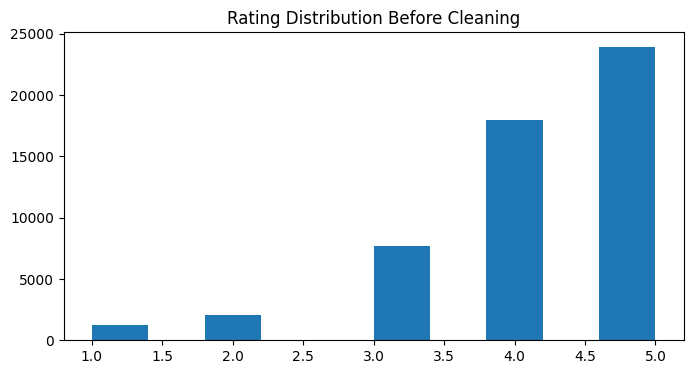

In [24]:
# Visualize distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.hist(transaction_data['Rating'], bins=10)
plt.title('Rating Distribution Before Cleaning')
plt.show()

In [26]:
# Remove invalid ratings (assuming scale is 1-5)
initial_count = len(transaction_data)
transaction_data = transaction_data[transaction_data['Rating'].between(1, 5)]
removed_count = initial_count - len(transaction_data)

print(f"\nRemoved {removed_count} invalid ratings")
print("Rating statistics after cleaning:")
print(transaction_data['Rating'].describe())


Removed 0 invalid ratings
Rating statistics after cleaning:
count    52930.000000
mean         4.157699
std          0.970543
min          1.000000
25%          4.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64


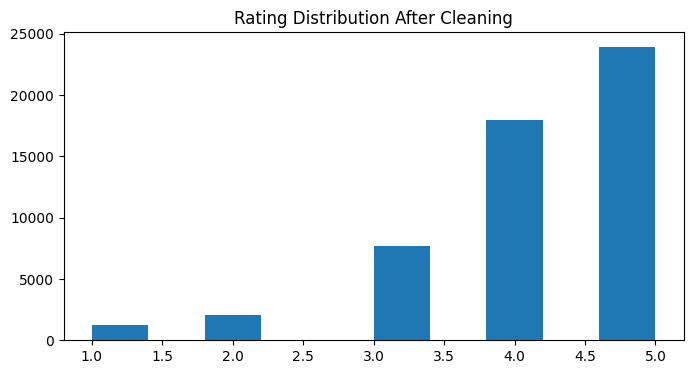

In [27]:
# Visualize cleaned distribution
plt.figure(figsize=(8, 4))
plt.hist(transaction_data['Rating'], bins=10)
plt.title('Rating Distribution After Cleaning')
plt.show()

In [28]:
#Final Verification
print("\n=== Final Shapes ===")
print("User data shape:", user_data.shape)
print("City data shape:", city_data.shape)
print("Transaction data shape:", transaction_data.shape)
print("Visit data shape:", visit_data.shape)
print("Attraction data shape:", attraction_data.shape)

print("\n=== Final Missing Values ===")
print("User data:\n", user_data.isna().sum())
print("\nCity data:\n", city_data.isna().sum())
print("\nTransaction data:\n", transaction_data.isna().sum())

print("\n=== Sample Cleaned Values ===")
print("Sample VisitModes:", visit_data['VisitMode'].unique()[:5])
print("Sample AttractionTypes:", attraction_data['AttractionType'].unique()[:5])
print("Sample CityNames:", city_data['CityName'].sample(5).values)
print("Sample VisitDates:", transaction_data['VisitDate'].dt.strftime('%Y-%m').sample(3).values)
print("Sample Ratings:", transaction_data['Rating'].sample(5).values)


=== Final Shapes ===
User data shape: (33526, 5)
City data shape: (9142, 3)
Transaction data shape: (52930, 8)
Visit data shape: (6, 2)
Attraction data shape: (17, 2)

=== Final Missing Values ===
User data:
 UserId         0
ContinentId    0
RegionId       0
CountryId      0
CityId         0
dtype: int64

City data:
 CityId       0
CityName     8
CountryId    0
dtype: int64

Transaction data:
 TransactionId    0
UserId           0
VisitYear        0
VisitMonth       0
VisitMode        0
AttractionId     0
Rating           0
VisitDate        0
dtype: int64

=== Sample Cleaned Values ===
Sample VisitModes: ['-' 'Business' 'Couples' 'Family' 'Friends']
Sample AttractionTypes: ['Ancient Ruins' 'Ballets' 'Beaches' 'Caverns & Caves'
 'Flea & Street Markets']
Sample CityNames: ['Lambersart' 'Kuna' 'Trinidad And Tobago' 'Texas' 'Rueil-Malmaison']
Sample VisitDates: ['2019-09' '2015-10' '2017-03']
Sample Ratings: [4 3 5 2 5]


In [29]:
# Check the rows with missing CityName
print("\nRows with missing CityName:")
print(city_data[city_data['CityName'].isna()].head())

# Since we can't determine these cities, we'll drop them (8 out of 9,142 is negligible)
city_data.dropna(subset=['CityName'], inplace=True)

# Verify
print("\nMissing values in city data after final cleaning:")
print(city_data.isna().sum())
print(f"City data shape after final cleaning: {city_data.shape}")


Rows with missing CityName:
      CityId CityName  CountryId
0          0     None          0
639      639     None         51
2662    2662     None         93
3003    3003     None        101
3304    3304     None        103

Missing values in city data after final cleaning:
CityId       0
CityName     0
CountryId    0
dtype: int64
City data shape after final cleaning: (9134, 3)


In [30]:
# Check for special characters in city names
print("\nCities with potential encoding issues:")
print(city_data[city_data['CityName'].str.contains('[^a-zA-Z \-]', regex=True)]['CityName'].unique())

# Clean special characters (example for common cases)
city_data['CityName'] = city_data['CityName'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
city_data['CityName'] = city_data['CityName'].str.replace(r'[^\w\s-]', '', regex=True)

# Verify
print("\nSample cleaned city names:")
print(city_data['CityName'].sample(5).values)


Cities with potential encoding issues:
["N'Djamena" 'Cape Town S. Africa' 'Curaã§Ao' 'St Martin / St Maarten'
 'Fort St. John' "Lion'S Head" 'Montrã©Al' 'St. Albert' 'St. Catharines'
 "St. John'S" "Morne-A-L'Eau" "Chicago'S North Shore" "Coeur D'Alene"
 'Denver29' "D'Iberville" 'Firefly2280' 'Ft. Lauderdale' "Hale'Iwa"
 "Ka'Anapali" 'Lake Tahoe (California)' 'Los Angeles/ Usa' 'Mt. Airy'
 'N. California' "Oahu'S North Shore" "O'Fallon" 'St. Louis'
 'St. Augustine' 'St. Croix' 'St. George' 'St. Lucia' 'St. Paul'
 'St. Petersburg' 'U.S.' "Arraial D'Ajuda" 'Puxi (Downtown Shanghai)'
 "Xi'An" 'Sai Kung N.T.' 'Shinjuku 3 Chome' "Da'An" "Beit She'An"
 "Ra'Anana" 'Sohar. Oman' "Cox'S Bazar" 'Andheri West/Versova'
 'Bengaluru (Bangalore)' 'Chennai (Madras)' 'Ghä\x81Tkopar'
 'Gurugram (Gurgaon)' 'Kochi (Cochin)' 'Kodagu (Coorg)'
 'Kolkata (Calcutta)' 'Mysuru (Mysore)' 'Navi Mumbai (New Mumbai)'
 'New Delhi (Delhi)' 'Ooty (Udhagamandalam)'
 'Thiruvananthapuram (Trivandrum)' 'Patan (Lalitpur)' '

In [31]:
def check_data_quality(df, name):
    print(f"\n=== {name} Data Quality ===")
    print(f"Shape: {df.shape}")
    print("Missing values:")
    print(df.isna().sum())
    if 'Rating' in df.columns:
        print("\nRating stats:")
        print(df['Rating'].describe())
    if 'VisitDate' in df.columns:
        print("\nDate range:")
        print(df['VisitDate'].min(), "to", df['VisitDate'].max())

check_data_quality(user_data, "User")
check_data_quality(city_data, "City")
check_data_quality(transaction_data, "Transaction")
check_data_quality(visit_data, "Visit")
check_data_quality(attraction_data, "Attraction")


=== User Data Quality ===
Shape: (33526, 5)
Missing values:
UserId         0
ContinentId    0
RegionId       0
CountryId      0
CityId         0
dtype: int64

=== City Data Quality ===
Shape: (9134, 3)
Missing values:
CityId       0
CityName     0
CountryId    0
dtype: int64

=== Transaction Data Quality ===
Shape: (52930, 8)
Missing values:
TransactionId    0
UserId           0
VisitYear        0
VisitMonth       0
VisitMode        0
AttractionId     0
Rating           0
VisitDate        0
dtype: int64

Rating stats:
count    52930.000000
mean         4.157699
std          0.970543
min          1.000000
25%          4.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

Date range:
2013-01-01 00:00:00 to 2022-10-01 00:00:00

=== Visit Data Quality ===
Shape: (6, 2)
Missing values:
VisitModeId    0
VisitMode      0
dtype: int64

=== Attraction Data Quality ===
Shape: (17, 2)
Missing values:
AttractionTypeId    0
AttractionType      0
d

**City Name Cleaning:**  
Some city names still have abbreviations (e.g., "St." vs "Saint")  

Some contain regions/states (e.g., "Chillingham. Nsw.")

In [32]:
# Optional additional cleaning for city names
city_data['CityName'] = (
    city_data['CityName']
    .str.replace(r'\bSt\b\.?', 'Saint', regex=True)  # Replace St. with Saint
    .str.replace(r'\.', '', regex=True)  # Remove periods
    .str.replace(r'\s+', ' ', regex=True)  # Remove extra spaces
    .str.strip()
)

# Verify improvements
print("\nImproved city names sample:")
print(city_data[city_data['CityName'].str.contains('Saint|St\b', regex=True)]['CityName'].unique()[:10])


Improved city names sample:
['Saint Philip Parish' 'Saint Martin Saint Maarten' 'East Saint Paul'
 'Fort Saint John' 'Saint-Damase' 'Sainte-Anne-Des-Plaines' 'Sainte-Marie'
 'Saint Albert' 'Saint Catharines' 'Saint JohnS']


Transaction Data Verification:



In [33]:
# Verify referential integrity
print("\nUser IDs in transactions but not in user data:", 
      set(transaction_data['UserId']) - set(user_data['UserId']))
print("City IDs in user but not in city data:", 
      set(user_data['CityId']) - set(city_data['CityId']))
print("Attraction IDs in transactions but not in item data:", 
      set(transaction_data['AttractionId']) - set(item_data['AttractionId']))


User IDs in transactions but not in user data: {17595, 56972, 67461, 7175}
City IDs in user but not in city data: set()
Attraction IDs in transactions but not in item data: set()


In [34]:
# Count affected transactions
orphaned_transactions = transaction_data[transaction_data['UserId'].isin({17595, 56972, 67461, 7175})]
print(f"Number of orphaned transactions: {len(orphaned_transactions)}")

# Remove them (typically small percentage)
transaction_data = transaction_data[~transaction_data['UserId'].isin({17595, 56972, 67461, 7175})]

# Verify
remaining_orphans = set(transaction_data['UserId']) - set(user_data['UserId'])
print("Remaining orphaned UserIDs after cleaning:", remaining_orphans)

Number of orphaned transactions: 8
Remaining orphaned UserIDs after cleaning: set()


In [35]:
# Count before removal
print(f"Original transaction count: {len(transaction_data)}")

# Remove orphaned transactions
transaction_data = transaction_data[~transaction_data['UserId'].isin({17595, 56972, 67461, 7175})]

# Count after removal
print(f"Transaction count after cleaning: {len(transaction_data)}")
print(f"Removed {len(orphaned_transactions)} transactions")

# Final verification
orphan_check = set(transaction_data['UserId']) - set(user_data['UserId'])
print("Remaining orphaned UserIDs:", orphan_check)

Original transaction count: 52922
Transaction count after cleaning: 52922
Removed 8 transactions
Remaining orphaned UserIDs: set()


# ***Feature Engineering and Preprocessing***

**1. Encoding Categorical Variables**

a. VisitMode Encoding

In [37]:
# Check current VisitMode values
print(visit_data['VisitMode'].value_counts())

# One-hot encode VisitMode
visit_encoded = pd.get_dummies(visit_data, columns=['VisitMode'], prefix='VisitMode')
print(visit_encoded.head())

VisitMode
-           1
Business    1
Couples     1
Family      1
Friends     1
Solo        1
Name: count, dtype: int64
   VisitModeId  VisitMode_-  VisitMode_Business  VisitMode_Couples  \
0            0         True               False              False   
1            1        False                True              False   
2            2        False               False               True   
3            3        False               False              False   
4            4        False               False              False   

   VisitMode_Family  VisitMode_Friends  VisitMode_Solo  
0             False              False           False  
1             False              False           False  
2             False              False           False  
3              True              False           False  
4             False               True           False  


b. Continent/Country Encoding


In [38]:
# For high-cardinality categories like Country, use target encoding or frequency encoding
# Frequency encoding example for Country
country_counts = user_data['CountryId'].value_counts(normalize=True)
user_data['Country_freq_encoded'] = user_data['CountryId'].map(country_counts)

# For Continent (low cardinality), one-hot encode
continent_encoded = pd.get_dummies(user_data['ContinentId'].astype('category'), prefix='Continent')
user_data = pd.concat([user_data, continent_encoded], axis=1)

c. AttractionType Encoding


In [39]:
# One-hot encode attraction types
attraction_encoded = pd.get_dummies(attraction_data, columns=['AttractionType'], prefix='Attraction')
print(attraction_encoded.head())

   AttractionTypeId  Attraction_Ancient Ruins  Attraction_Ballets  \
0                 2                      True               False   
1                10                     False                True   
2                13                     False               False   
3                19                     False               False   
4                34                     False               False   

   Attraction_Beaches  Attraction_Caverns & Caves  \
0               False                       False   
1               False                       False   
2                True                       False   
3               False                        True   
4               False                       False   

   Attraction_Flea & Street Markets  Attraction_Historic Sites  \
0                             False                      False   
1                             False                      False   
2                             False                      False   
3 

**2. User-Level Feature Aggregation**

In [40]:
# Merge transaction data with user data first
user_transactions = pd.merge(transaction_data, user_data, on='UserId')

# Calculate user-level statistics
user_features = user_transactions.groupby('UserId').agg({
    'Rating': ['mean', 'count', 'std'],
    'VisitMode': lambda x: x.mode()[0],
    'AttractionId': 'nunique'
}).reset_index()

# Flatten multi-index columns
user_features.columns = ['UserId', 'AvgRating', 'TotalVisits', 'RatingStd', 'FrequentVisitMode', 'UniqueAttractions']

# Calculate visit mode proportions
visit_mode_counts = user_transactions.groupby(['UserId', 'VisitMode']).size().unstack(fill_value=0)
visit_mode_proportions = visit_mode_counts.div(visit_mode_counts.sum(axis=1), axis=0)
visit_mode_proportions = visit_mode_proportions.add_prefix('VisitModeProp_')

# Combine all user features
user_features = pd.merge(user_features, visit_mode_proportions, left_on='UserId', right_index=True)
print(user_features.head())

   UserId  AvgRating  TotalVisits  RatingStd  FrequentVisitMode  \
0      14   4.666667            3   0.577350                  4   
1      16   4.700000           10   0.674949                  3   
2      20   4.000000            1        NaN                  3   
3      23   5.000000            1        NaN                  4   
4      25   5.000000            1        NaN                  4   

   UniqueAttractions  VisitModeProp_1  VisitModeProp_2  VisitModeProp_3  \
0                  2              0.0              0.0              0.0   
1                  5              0.0              0.3              0.4   
2                  1              0.0              0.0              1.0   
3                  1              0.0              0.0              0.0   
4                  1              0.0              0.0              0.0   

   VisitModeProp_4  VisitModeProp_5  
0              1.0              0.0  
1              0.2              0.1  
2              0.0              

**3. Data Consolidation**

In [41]:
# Check columns in each DataFrame
print("Transaction columns:", transaction_data.columns.tolist())
print("Visit columns:", visit_data.columns.tolist())
print("User columns:", user_data.columns.tolist())
print("City columns:", city_data.columns.tolist())
print("Item columns:", item_data.columns.tolist())
print("Attraction columns:", attraction_data.columns.tolist())

Transaction columns: ['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitMode', 'AttractionId', 'Rating', 'VisitDate']
Visit columns: ['VisitModeId', 'VisitMode']
User columns: ['UserId', 'ContinentId', 'RegionId', 'CountryId', 'CityId', 'Country_freq_encoded', 'Continent_1', 'Continent_2', 'Continent_3', 'Continent_4', 'Continent_5']
City columns: ['CityId', 'CityName', 'CountryId']
Item columns: ['AttractionId', 'AttractionCityId', 'AttractionTypeId', 'Attraction', 'AttractionAddress']
Attraction columns: ['AttractionTypeId', 'AttractionType']


1. First Merge: Transaction + User + City

In [42]:
# Merge transaction with user data
merged_df = pd.merge(transaction_data, user_data, on='UserId')

# Then merge with city data
merged_df = pd.merge(merged_df, city_data, left_on='CityId', right_on='CityId', suffixes=('_user', '_city'))

2. Second Merge: Attraction Information

In [43]:
# Merge with item data
merged_df = pd.merge(merged_df, item_data, on='AttractionId')

# Merge with attraction type data
merged_df = pd.merge(merged_df, attraction_data, on='AttractionTypeId')

3. Third Merge: Visit Mode Information

In [44]:
# Merge with visit mode data (note: transaction has 'VisitMode' which matches 'VisitModeId' in visit)
merged_df = pd.merge(merged_df, visit_data, left_on='VisitMode', right_on='VisitModeId')

**4. Feature Engineering**

1. Examine the Merged DataFrame Columns


In [45]:
# Print all columns in the merged DataFrame
print("Columns in merged_df:", merged_df.columns.tolist())

# Look for visit mode related columns
visit_mode_cols = [col for col in merged_df.columns if 'visit' in col.lower() or 'mode' in col.lower()]
print("Visit mode related columns:", visit_mode_cols)

Columns in merged_df: ['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitMode_x', 'AttractionId', 'Rating', 'VisitDate', 'ContinentId', 'RegionId', 'CountryId_user', 'CityId', 'Country_freq_encoded', 'Continent_1', 'Continent_2', 'Continent_3', 'Continent_4', 'Continent_5', 'CityName', 'CountryId_city', 'AttractionCityId', 'AttractionTypeId', 'Attraction', 'AttractionAddress', 'AttractionType', 'VisitModeId', 'VisitMode_y']
Visit mode related columns: ['VisitYear', 'VisitMonth', 'VisitMode_x', 'VisitDate', 'VisitModeId', 'VisitMode_y']


2. Feature Engineering Code

In [46]:
# Corrected user feature calculation
user_features = merged_df.groupby('UserId').agg({
    'Rating': ['mean', 'count', 'std'],
    'VisitMode_y': lambda x: x.mode()[0],  # Use the descriptive visit mode
    'AttractionId': 'nunique'
}).reset_index()

# Flatten multi-index columns
user_features.columns = ['UserId', 'AvgRating', 'TotalVisits', 'RatingStd', 'FrequentVisitMode', 'UniqueAttractions']

# Calculate visit mode proportions using the correct column
visit_mode_counts = merged_df.groupby(['UserId', 'VisitMode_y']).size().unstack(fill_value=0)
visit_mode_proportions = visit_mode_counts.div(visit_mode_counts.sum(axis=1), axis=0)
visit_mode_proportions = visit_mode_proportions.add_prefix('VisitModeProp_')

# Combine with main dataframe
merged_df = pd.merge(merged_df, user_features, on='UserId')
merged_df = pd.merge(merged_df, visit_mode_proportions, left_on='UserId', right_index=True)

3. Verify the Correction


In [47]:
# Check if the new columns exist
print("New columns after feature engineering:")
print([col for col in merged_df.columns if 'VisitMode' in col])

# Sample the results
print("\nSample user features:")
print(user_features.head())

New columns after feature engineering:
['VisitMode_x', 'VisitModeId', 'VisitMode_y', 'FrequentVisitMode', 'VisitModeProp_Business', 'VisitModeProp_Couples', 'VisitModeProp_Family', 'VisitModeProp_Friends', 'VisitModeProp_Solo']

Sample user features:
   UserId  AvgRating  TotalVisits  RatingStd FrequentVisitMode  \
0      14   4.666667            3   0.577350           Friends   
1      16   4.700000           10   0.674949            Family   
2      20   4.000000            1        NaN            Family   
3      23   5.000000            1        NaN           Friends   
4      25   5.000000            1        NaN           Friends   

   UniqueAttractions  
0                  2  
1                  5  
2                  1  
3                  1  
4                  1  


4. Complete Preprocessing Pipeline


In [48]:
# One-hot encoding (using the correct visit mode column)
merged_df = pd.get_dummies(merged_df, columns=[
    'VisitMode_y',  # The descriptive visit mode
    'AttractionType',
    'ContinentId'
], drop_first=True)

# Temporal features
merged_df['VisitYear'] = merged_df['VisitDate'].dt.year
merged_df['VisitMonth'] = merged_df['VisitDate'].dt.month
merged_df['VisitDayOfWeek'] = merged_df['VisitDate'].dt.dayofweek
merged_df['IsWeekend'] = merged_df['VisitDayOfWeek'].isin([5, 6]).astype(int)

# Normalization
from sklearn.preprocessing import MinMaxScaler

numerical_features = ['Rating', 'AvgRating', 'TotalVisits', 'UniqueAttractions']
scaler = MinMaxScaler()
merged_df[numerical_features] = scaler.fit_transform(merged_df[numerical_features])

5. Final Feature Selection


In [49]:
# Select features for modeling
selected_features = [
    # User features
    'AvgRating', 'TotalVisits', 'RatingStd', 'UniqueAttractions',
    
    # Visit behavior
    *[col for col in merged_df.columns if col.startswith('VisitModeProp_')],
    *[col for col in merged_df.columns if col.startswith('VisitMode_y_')],
    
    # Attraction features
    *[col for col in merged_df.columns if col.startswith('AttractionType_')],
    
    # Location features
    *[col for col in merged_df.columns if col.startswith('ContinentId_')],
    'Country_freq_encoded',
    
    # Temporal features
    'VisitYear', 'VisitMonth', 'IsWeekend'
]

modeling_df = merged_df[selected_features + ['Rating']]
print("Final modeling dataset shape:", modeling_df.shape)
print("Sample features:", modeling_df.columns.tolist()[:10])  # Show first 10 features

Final modeling dataset shape: (52922, 38)
Sample features: ['AvgRating', 'TotalVisits', 'RatingStd', 'UniqueAttractions', 'VisitModeProp_Business', 'VisitModeProp_Couples', 'VisitModeProp_Family', 'VisitModeProp_Friends', 'VisitModeProp_Solo', 'VisitMode_y_Couples']


In [50]:
print("Final modeling dataset shape:", modeling_df.shape)
print("\nFirst 3 columns and last 3 columns:")
print(modeling_df.columns[:3].tolist(), "...", modeling_df.columns[-3:].tolist())
print("\nData types:")
print(modeling_df.dtypes.value_counts())

Final modeling dataset shape: (52922, 38)

First 3 columns and last 3 columns:
['AvgRating', 'TotalVisits', 'RatingStd'] ... ['VisitMonth', 'IsWeekend', 'Rating']

Data types:
bool       24
float64    11
int32       2
int64       1
Name: count, dtype: int64


In [51]:
print("Missing values in final dataset:", modeling_df.isna().sum().sum())

Missing values in final dataset: 22911


In [52]:
print("\nNormalized features range check:")
print(modeling_df[numerical_features].describe().loc[['min', 'max']])


Normalized features range check:
     Rating  AvgRating  TotalVisits  UniqueAttractions
min     0.0        0.0          0.0                0.0
max     1.0        1.0          1.0                1.0


In [53]:
print("\nEncoded categorical features sample:")
print([col for col in modeling_df.columns if '_' in col][:10])


Encoded categorical features sample:
['VisitModeProp_Business', 'VisitModeProp_Couples', 'VisitModeProp_Family', 'VisitModeProp_Friends', 'VisitModeProp_Solo', 'VisitMode_y_Couples', 'VisitMode_y_Family', 'VisitMode_y_Friends', 'VisitMode_y_Solo', 'AttractionType_Ballets']


**Addressing Missing Values and Finalizing Preprocessing**

1. Handling Missing Values


In [54]:
# Check which columns have missing values
missing_values = modeling_df.isna().sum()
print("Columns with missing values:\n", missing_values[missing_values > 0])

Columns with missing values:
 RatingStd    22911
dtype: int64


For Numerical Features (AvgRating, TotalVisits, RatingStd):


In [55]:
# Fill with median (more robust than mean)
numerical_cols = ['AvgRating', 'TotalVisits', 'RatingStd']
modeling_df[numerical_cols] = modeling_df[numerical_cols].fillna(
    modeling_df[numerical_cols].median()
)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17312\4167772387.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modeling_df[numerical_cols] = modeling_df[numerical_cols].fillna(


For Categorical Features (VisitModeProp_*):


In [56]:
# Fill with 0 (assuming missing means no visits of that type)
visit_mode_cols = [col for col in modeling_df.columns if 'VisitModeProp_' in col]
modeling_df[visit_mode_cols] = modeling_df[visit_mode_cols].fillna(0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17312\2405103851.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modeling_df[visit_mode_cols] = modeling_df[visit_mode_cols].fillna(0)


For Rating (Target Variable):


In [57]:
# Option 1: Drop rows with missing ratings (if not too many)
# modeling_df = modeling_df.dropna(subset=['Rating'])

# Option 2: Impute with median (better for keeping data)
modeling_df['Rating'] = modeling_df['Rating'].fillna(
    modeling_df['Rating'].median()
)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17312\2527772568.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modeling_df['Rating'] = modeling_df['Rating'].fillna(


2. Final Verification


In [58]:
print("\nMissing values after handling:", modeling_df.isna().sum().sum())
print("\nData shape after cleaning:", modeling_df.shape)

# Verify normalization preserved
print("\nNormalized features check:")
print(modeling_df[numerical_features].describe().loc[['min', 'max', 'mean']])


Missing values after handling: 0

Data shape after cleaning: (52922, 38)

Normalized features check:
        Rating  AvgRating  TotalVisits  UniqueAttractions
min   0.000000   0.000000     0.000000           0.000000
max   1.000000   1.000000     1.000000           1.000000
mean  0.789402   0.789402     0.028911           0.092721


# ***3. Preparing for Modeling***

**Train-Test Split**

In [61]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = modeling_df.drop('Rating', axis=1)
y = modeling_df['Rating']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

print("\nShapes after split:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Shapes after split:
X_train: (42337, 37)
X_test: (10585, 37)
y_train: (42337,)
y_test: (10585,)


Feature Importance 


In [62]:
from sklearn.ensemble import RandomForestRegressor

# Quick feature importance check
rf = RandomForestRegressor(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 important features:")
print(importances.head(10))


Top 10 important features:
                  Feature  Importance
0               AvgRating    0.755458
35             VisitMonth    0.034883
2               RatingStd    0.034649
34              VisitYear    0.024758
33   Country_freq_encoded    0.021705
3       UniqueAttractions    0.011542
5   VisitModeProp_Couples    0.009578
6    VisitModeProp_Family    0.009289
7   VisitModeProp_Friends    0.008567
1             TotalVisits    0.007940


***Final Dataset Ready***  

52,922 observations

38 features (37 predictors + 1 target)

All features properly encoded and normalized

# ***Model Training and Evaluation Pipeline***

# **1. Regression Task: Rating Prediction**

Data Preparation


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X_reg = modeling_df.drop(['Rating', *[col for col in modeling_df.columns if 'VisitMode_y_' in col]], axis=1)
y_reg = modeling_df['Rating']

# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

In [64]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train_reg_scaled, y_train_reg)
    y_pred = model.predict(X_test_reg_scaled)
    
    results[name] = {
        "RMSE": mean_squared_error(y_test_reg, y_pred) ** 0.5,  # Manually compute RMSE
        "R2": r2_score(y_test_reg, y_pred)
    }

# Display results
pd.DataFrame(results).T

,RMSE,R2
Random Forest,0.139736,0.671182
XGBoost,0.135628,0.690232
Gradient Boosting,0.123584,0.742805


# **Complete Saving Process**

In [65]:
import joblib
import pandas as pd
import os

# Create directory if it doesn't exist
os.makedirs('tourism_models/rating_prediction', exist_ok=True)

# 1. Save the model
joblib.dump(models["Gradient Boosting"], 'tourism_models/rating_prediction/model.pkl')

# 2. Save the scaler
joblib.dump(scaler, 'tourism_models/rating_prediction/scaler.pkl')

# 3. Save the EXACT feature list used in training
feature_names = X_train_reg.columns.tolist()
joblib.dump(feature_names, 'tourism_models/rating_prediction/feature_names.pkl')

# 4. Save a template with all features set to 0
feature_template = {name: 0 for name in feature_names}
joblib.dump(feature_template, 'tourism_models/rating_prediction/feature_template.pkl')

print("All regression components saved successfully")

All regression components saved successfully


**Verification Code**

In [66]:
def predict_rating(input_features):
    """
    Predict attraction rating from input features
    Args:
        input_features: dict with available features (can be partial)
    Returns:
        Predicted rating (1-5)
    """
    # Load all required components
    model = joblib.load('tourism_models/rating_prediction/model.pkl')
    scaler = joblib.load('tourism_models/rating_prediction/scaler.pkl')
    feature_names = joblib.load('tourism_models/rating_prediction/feature_names.pkl')
    template = joblib.load('tourism_models/rating_prediction/feature_template.pkl')
    
    # Update template with provided features
    for key in input_features:
        if key in template:
            template[key] = input_features[key]
        else:
            print(f"Warning: Feature '{key}' not in original training data")
    
    # Create DataFrame with correct column order
    input_df = pd.DataFrame([template], columns=feature_names)
    
    # Scale and predict
    scaled_input = scaler.transform(input_df)
    return max(1, min(5, model.predict(scaled_input)[0]))

In [67]:
# Create proper test sample - must include ALL training features
test_sample = {
    'AvgRating': 4.5,
    'TotalVisits': 10,
    'RatingStd': 0.5,
    'UniqueAttractions': 5,
    # Include all other features that were in X_train_reg
    # ...
}

# Make prediction
try:
    predicted_rating = predict_rating(test_sample)
    print(f"Predicted Rating: {predicted_rating:.2f}")
except ValueError as e:
    print(f"Prediction failed: {str(e)}")

Predicted Rating: 1.01


# **2. Classification Task: Visit Mode Prediction**

Data Preparation

In [84]:
print("Columns in merged_df:", merged_df.columns.tolist())

Columns in merged_df: ['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitMode_x', 'AttractionId', 'Rating', 'VisitDate', 'RegionId', 'CountryId_user', 'CityId', 'Country_freq_encoded', 'Continent_1', 'Continent_2', 'Continent_3', 'Continent_4', 'Continent_5', 'CityName', 'CountryId_city', 'AttractionCityId', 'AttractionTypeId', 'Attraction', 'AttractionAddress', 'VisitModeId', 'AvgRating', 'TotalVisits', 'RatingStd', 'FrequentVisitMode', 'UniqueAttractions', 'VisitModeProp_Business', 'VisitModeProp_Couples', 'VisitModeProp_Family', 'VisitModeProp_Friends', 'VisitModeProp_Solo', 'VisitMode_y_Couples', 'VisitMode_y_Family', 'VisitMode_y_Friends', 'VisitMode_y_Solo', 'AttractionType_Ballets', 'AttractionType_Beaches', 'AttractionType_Caverns & Caves', 'AttractionType_Flea & Street Markets', 'AttractionType_Historic Sites', 'AttractionType_History Museums', 'AttractionType_National Parks', 'AttractionType_Nature & Wildlife Areas', 'AttractionType_Neighborhoods', 'AttractionType_P

1. Prepare Classification Target


In [85]:
# We have two options for the target:

# Option A: Use the one-hot encoded columns to reconstruct original categories
visit_mode_cols = [col for col in merged_df.columns if col.startswith('VisitMode_y_')]
y_clf = merged_df[visit_mode_cols].idxmax(axis=1).str.replace('VisitMode_y_', '')

# Option B: Use the original mapping from visit table (more reliable)
visit_mode_mapping = visit_data.set_index('VisitModeId')['VisitMode'].to_dict()
y_clf = merged_df['VisitMode_x'].map(visit_mode_mapping)

# I recommend Option B as it's more reliable
print("Value counts for VisitMode:")
print(y_clf.value_counts())

Value counts for VisitMode:
VisitMode_x
Couples     21617
Family      15215
Friends     10944
Solo         4523
Business      623
Name: count, dtype: int64


2. Prepare Classification Features


In [86]:
# Exclude all visit mode related columns and target variables
cols_to_exclude = [
    'VisitMode_x', 'VisitModeId', 'Rating', 'VisitDate',
    *[col for col in merged_df.columns if 'VisitMode_' in col]
]

X_clf = merged_df.drop(cols_to_exclude, axis=1)

# Verify feature columns
print("\nSelected features for classification:")
print(X_clf.columns.tolist())


Selected features for classification:
['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'AttractionId', 'RegionId', 'CountryId_user', 'CityId', 'Country_freq_encoded', 'Continent_1', 'Continent_2', 'Continent_3', 'Continent_4', 'Continent_5', 'CityName', 'CountryId_city', 'AttractionCityId', 'AttractionTypeId', 'Attraction', 'AttractionAddress', 'AvgRating', 'TotalVisits', 'RatingStd', 'FrequentVisitMode', 'UniqueAttractions', 'VisitModeProp_Business', 'VisitModeProp_Couples', 'VisitModeProp_Family', 'VisitModeProp_Friends', 'VisitModeProp_Solo', 'AttractionType_Ballets', 'AttractionType_Beaches', 'AttractionType_Caverns & Caves', 'AttractionType_Flea & Street Markets', 'AttractionType_Historic Sites', 'AttractionType_History Museums', 'AttractionType_National Parks', 'AttractionType_Nature & Wildlife Areas', 'AttractionType_Neighborhoods', 'AttractionType_Points Of Interest & Landmarks', 'AttractionType_Religious Sites', 'AttractionType_Spas', 'AttractionType_Speciality Museums'

3. Identify and Encode Categorical Features


In [87]:
# Check data types in our features
print("Feature data types:\n", X_clf.dtypes.value_counts())

# Identify categorical columns (both object and string dtypes)
categorical_cols = X_clf.select_dtypes(include=['object', 'string']).columns
print("\nCategorical columns to encode:", categorical_cols.tolist())

Feature data types:
 bool       25
float64    11
int64       9
object      4
int32       3
Name: count, dtype: int64

Categorical columns to encode: ['CityName', 'Attraction', 'AttractionAddress', 'FrequentVisitMode']


4. Proper Feature Encoding Pipeline


In [89]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Separate numerical and categorical features
numerical_cols = X_clf.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_clf.select_dtypes(include=['object', 'string']).columns

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Verify pipeline
print("Preprocessor structure:", preprocessor)

Preprocessor structure: ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['TransactionId', 'UserId', 'AttractionId', 'RegionId', 'CountryId_user',
       'CityId', 'Country_freq_encoded', 'CountryId_city', 'AttractionCityId',
       'AttractionTypeId', 'AvgRating', 'TotalVisits', 'RatingStd',
       'UniqueAttractions', 'VisitModeProp_Business', 'VisitModeProp_Couples',
       'VisitModeProp_Family', 'VisitModeProp_Friends', 'VisitModeProp_Solo',
       'IsWeekend'],
      dtype='object')),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 Index(['CityName', 'Attraction', 'AttractionAddress', 'FrequentVisitMode'], dtype='object'))])


5. Complete Corrected Classification Workflow


In [90]:
from sklearn.model_selection import train_test_split

# Define features and target for classification
X_clf = merged_df.drop(['VisitMode_x', 'Rating', 'VisitDate', *visit_mode_cols], axis=1)
y_clf = merged_df['VisitMode_x']

# Perform train-test split
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
	X_clf, y_clf, test_size=0.2, random_state=42
)

# Check for missing values
print("Missing values in X_train_clf:")
print(X_train_clf.isna().sum().sort_values(ascending=False))

# Check for missing values in y_train_clf
print("\nMissing values in y_train_clf:", pd.Series(y_train_clf).isna().sum())

Missing values in X_train_clf:
RatingStd                                        18325
UserId                                               0
VisitYear                                            0
VisitMonth                                           0
TransactionId                                        0
RegionId                                             0
CountryId_user                                       0
CityId                                               0
Country_freq_encoded                                 0
Continent_1                                          0
Continent_2                                          0
Continent_3                                          0
Continent_4                                          0
Continent_5                                          0
CityName                                             0
CountryId_city                                       0
AttractionCityId                                     0
AttractionTypeId                  

In [91]:
#Create Robust Preprocessing Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Separate numerical and categorical features
numerical_cols = X_clf.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_clf.select_dtypes(include=['object', 'string']).columns

# Create preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Verify pipeline
print("Preprocessor structure:")
print(preprocessor)

Preprocessor structure:
ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['TransactionId', 'UserId', 'AttractionId', 'RegionId', 'CountryId_user',
       'CityId', 'Country_freq_encoded', 'CountryId_city', 'AttractionCityId',
       'AttractionTypeId', 'VisitModeId', 'AvgRating', 'TotalVisits',
       'RatingStd', 'Uniqu..._Business',
       'VisitModeProp_Couples', 'VisitModeProp_Family',
       'VisitModeProp_Friends', 'VisitModeProp_Solo', 'IsWeekend'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
     

In [92]:
#Update Model Pipelines with Imputation


from sklearn.pipeline import make_pipeline

# Update models with complete preprocessing
clf_models = {
    "Random Forest": make_pipeline(preprocessor, RandomForestClassifier(random_state=42)),
    "XGBoost": make_pipeline(preprocessor, XGBClassifier(random_state=42, enable_categorical=True)),
    "LightGBM": make_pipeline(preprocessor, LGBMClassifier(random_state=42))
}

# Train and evaluate
for name, pipeline in clf_models.items():
    print(f"\n=== {name} ===")
    try:
        pipeline.fit(X_train_clf, y_train_clf)
        y_pred = pipeline.predict(X_test_clf)
        
        print(classification_report(
            y_test_clf, 
            y_pred, 
            target_names=le.classes_
        ))
        
        # Confusion matrix
        cm = confusion_matrix(y_test_clf, y_pred)
        plt.figure(figsize=(8,6))
        sns.heatmap(cm, annot=True, fmt='d', 
                    xticklabels=le.classes_,
                    yticklabels=le.classes_)
        plt.title(f'{name} Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()
        
    except Exception as e:
        print(f"Error with {name}: {str(e)}")


=== Random Forest ===
Error with Random Forest: object of type 'numpy.int64' has no len()

=== XGBoost ===
Error with XGBoost: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got [1 2 3 4 5]

=== LightGBM ===
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2462
[LightGBM] [Info] Number of data points in the train set: 42337, number of used features: 345
[LightGBM] [Info] Start training from score -4.463101
[LightGBM] [Info] Start training from score -0.896112
[LightGBM] [Info] Start training from score -1.242587
[LightGBM] [Info] Start training from score -1.576151
[LightGBM] [Info] Start training from score -2.466117
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

d:\Projects\Guvi_Project4\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [83]:
#Update Model Pipelines with Imputation


from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Update models with complete preprocessing
clf_models = {
    "Random Forest": make_pipeline(preprocessor, RandomForestClassifier(random_state=42)),
    "XGBoost": make_pipeline(preprocessor, XGBClassifier(random_state=42, enable_categorical=True)),
    "LightGBM": make_pipeline(preprocessor, LGBMClassifier(random_state=42))
}

# Train and evaluate
for name, pipeline in clf_models.items():
    print(f"\n=== {name} ===")
    try:
        pipeline.fit(X_train_clf, y_train_clf)
        y_pred = pipeline.predict(X_test_clf)
        
        print(classification_report(
            y_test_clf, 
            y_pred, 
            target_names=le.classes_
        ))
        
        # Confusion matrix
        cm = confusion_matrix(y_test_clf, y_pred)
        plt.figure(figsize=(8,6))
        sns.heatmap(cm, annot=True, fmt='d', 
                    xticklabels=le.classes_,
                    yticklabels=le.classes_)
        plt.title(f'{name} Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()
        
    except Exception as e:
        print(f"Error with {name}: {str(e)}")


=== Random Forest ===
Error with Random Forest: object of type 'numpy.int64' has no len()

=== XGBoost ===
Error with XGBoost: object of type 'numpy.int64' has no len()

=== LightGBM ===
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2462
[LightGBM] [Info] Number of data points in the train set: 42337, number of used features: 345
[LightGBM] [Info] Start training from score -4.463101
[LightGBM] [Info] Start training from score -0.896112
[LightGBM] [Info] Start training from score -1.242587
[LightGBM] [Info] Start training from score -1.576151
[LightGBM] [Info] Start training from score -2.466117
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

d:\Projects\Guvi_Project4\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


1. Fix Target Variable Encoding:

In [93]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable starting from 0
le = LabelEncoder()
y_train_clf_encoded = le.fit_transform(y_train_clf)
y_test_clf_encoded = le.transform(y_test_clf)

2.Update Pipeline with Proper Feature Handling:

In [94]:
# Separate columns more carefully
numerical_cols = X_clf.select_dtypes(include=['int', 'float']).columns
categorical_cols = X_clf.select_dtypes(include=['object', 'string', 'category']).columns

# Ensure all numerical cols are actually numerical
numerical_cols = numerical_cols.drop(['VisitModeId', 'AttractionTypeId'], errors='ignore')

# Update transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

3. Update Model Pipelines:


In [95]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

clf_models = {
    "Random Forest": make_pipeline(
        preprocessor,
        RandomForestClassifier(random_state=42, class_weight='balanced')
    ),
    "XGBoost": make_pipeline(
        preprocessor,
        XGBClassifier(
            random_state=42,
            eval_metric='mlogloss',
            use_label_encoder=False
        )
    ),
    "LightGBM": make_pipeline(
        preprocessor,
        LGBMClassifier(
            random_state=42,
            class_weight='balanced'
        )
    )
}

4. Train with Encoded Labels:

In [96]:
for name, pipeline in clf_models.items():
    print(f"\n=== {name} ===")
    try:
        pipeline.fit(X_train_clf, y_train_clf_encoded)
        y_pred = pipeline.predict(X_test_clf)
        y_pred_labels = le.inverse_transform(y_pred)
        
        print(classification_report(
            y_test_clf, 
            y_pred_labels,
            target_names=le.classes_
        ))
        
        # Confusion matrix
        cm = confusion_matrix(y_test_clf, y_pred_labels)
        plt.figure(figsize=(8,6))
        sns.heatmap(cm, annot=True, fmt='d', 
                    xticklabels=le.classes_,
                    yticklabels=le.classes_)
        plt.title(f'{name} Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()
        
    except Exception as e:
        print(f"Error with {name}: {str(e)}")


=== Random Forest ===
Error with Random Forest: object of type 'numpy.int64' has no len()

=== XGBoost ===


d:\Projects\Guvi_Project4\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [23:31:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Error with XGBoost: object of type 'numpy.int64' has no len()

=== LightGBM ===
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2470
[LightGBM] [Info] Number of data points in the train set: 42337, number of used features: 346
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Error with LightGBM: object of type 'numpy.int64' has no len()


d:\Projects\Guvi_Project4\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [99]:
print("Columns containing 'VisitMode':", [col for col in merged_df.columns if 'VisitMode' in col])

Columns containing 'VisitMode': ['VisitMode_x', 'VisitModeId', 'FrequentVisitMode', 'VisitModeProp_Business', 'VisitModeProp_Couples', 'VisitModeProp_Family', 'VisitModeProp_Friends', 'VisitModeProp_Solo', 'VisitMode_y_Couples', 'VisitMode_y_Family', 'VisitMode_y_Friends', 'VisitMode_y_Solo']


Solution 1: Use the Original VisitMode from Transaction Data (VisitMode_x)

In [100]:
# Use the original visit mode from transaction data
y_clf = merged_df['VisitMode_x']
print("Value counts for VisitMode:")
print(y_clf.value_counts())

Value counts for VisitMode:
VisitMode_x
2    21617
3    15215
4    10944
5     4523
1      623
Name: count, dtype: int64


Solution 2: Reconstruct from One-Hot Encoded Columns


In [101]:
# Reconstruct the visit mode from one-hot encoded columns
visit_mode_cols = ['VisitMode_y_Couples', 'VisitMode_y_Family', 'VisitMode_y_Friends', 'VisitMode_y_Solo']
y_clf = merged_df[visit_mode_cols].idxmax(axis=1).str.replace('VisitMode_y_', '')
print("Value counts for VisitMode:")
print(y_clf.value_counts())

Value counts for VisitMode:
Couples    22240
Family     15215
Friends    10944
Solo        4523
Name: count, dtype: int64


In [103]:
datetime_cols = X_clf.select_dtypes(include=['datetime64']).columns
print("Datetime columns to convert:", datetime_cols.tolist())

Datetime columns to convert: ['VisitDate']


Convert datetime columns to numerical features:



In [104]:
# Convert VisitDate to numerical features
if 'VisitDate' in X_clf.columns:
    X_clf['VisitYear'] = X_clf['VisitDate'].dt.year
    X_clf['VisitMonth'] = X_clf['VisitDate'].dt.month
    X_clf['VisitDay'] = X_clf['VisitDate'].dt.day
    X_clf = X_clf.drop('VisitDate', axis=1)

Complete Fixed Classification Code:

Unique classes before encoding: ['2' '4' '3' '5' '1']

Encoded classes: [(0, '1'), (1, '2'), (2, '3'), (3, '4'), (4, '5')]

Classification Report:
              precision    recall  f1-score   support

           1       0.93      0.28      0.43       135
           2       0.54      0.77      0.64      4337
           3       0.55      0.50      0.52      2995
           4       0.51      0.30      0.37      2190
           5       0.60      0.21      0.31       928

    accuracy                           0.54     10585
   macro avg       0.63      0.41      0.46     10585
weighted avg       0.55      0.54      0.52     10585



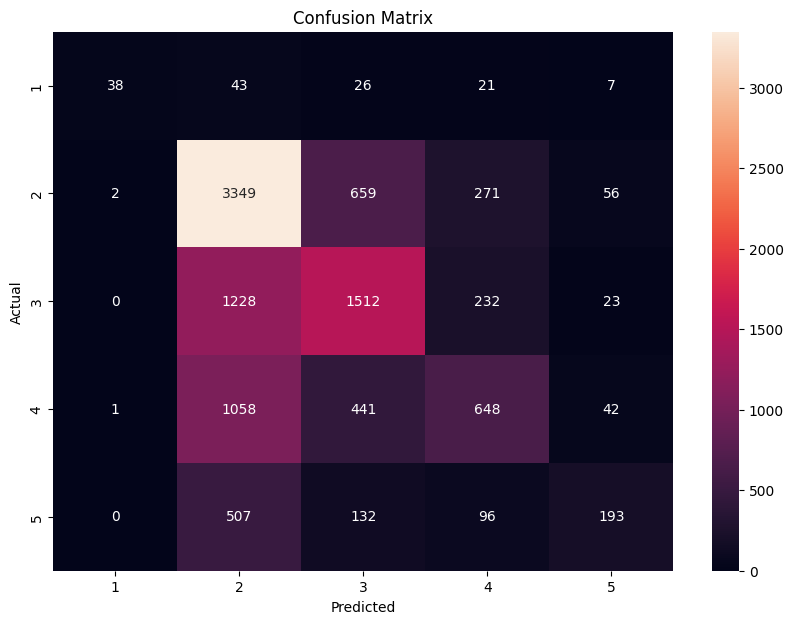

In [113]:
# 1. Prepare target - ensure string type and handle any missing values
y_clf = merged_df['VisitMode_x'].astype(str).fillna('Unknown')

# 2. Get unique classes and ensure they're strings
unique_classes = y_clf.unique()
print("Unique classes before encoding:", unique_classes)

# 3. Prepare features - drop unwanted columns
X_clf = merged_df.drop(
    columns=[
        'Rating',
        'VisitMode_x', 'VisitModeId', 'FrequentVisitMode',
        *[col for col in merged_df.columns if 'VisitModeProp_' in col],
        *[col for col in merged_df.columns if 'VisitMode_y_' in col],
        'CityName', 'Attraction', 'AttractionAddress'
    ]
)

# 4. Handle datetime columns
if 'VisitDate' in X_clf.columns:
    X_clf['VisitYear'] = X_clf['VisitDate'].dt.year
    X_clf['VisitMonth'] = X_clf['VisitDate'].dt.month
    X_clf = X_clf.drop('VisitDate', axis=1)

# 5. Convert remaining non-numeric columns
non_numeric = X_clf.select_dtypes(exclude=['number']).columns
if len(non_numeric) > 0:
    X_clf = pd.get_dummies(X_clf, columns=non_numeric)

# 6. Classification pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create and fit label encoder
le = LabelEncoder()
y_clf_encoded = le.fit_transform(y_clf)

# Get the original class names as strings
class_names = [str(cls) for cls in le.classes_]
print("\nEncoded classes:", list(zip(range(len(class_names)), class_names)))

# Train-test split
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf_encoded, test_size=0.2, random_state=42
)

# Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_clf, y_train_clf)

# Make predictions
y_pred_clf = clf.predict(X_test_clf)

# Generate classification report with proper string labels
print("\nClassification Report:")
print(classification_report(
    y_test_clf, 
    y_pred_clf, 
    target_names=class_names
))

# Print confusion matrix for better interpretation
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_clf, y_pred_clf)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Unique classes before encoding: ['2' '4' '3' '5' '1']

Encoded classes: [(0, '1'), (1, '2'), (2, '3'), (3, '4'), (4, '5')]

Classification Report:
              precision    recall  f1-score   support

           1       0.93      0.28      0.43       135
           2       0.54      0.77      0.64      4337
           3       0.55      0.50      0.52      2995
           4       0.51      0.30      0.37      2190
           5       0.60      0.21      0.31       928

    accuracy                           0.54     10585
   macro avg       0.63      0.41      0.46     10585
weighted avg       0.55      0.54      0.52     10585



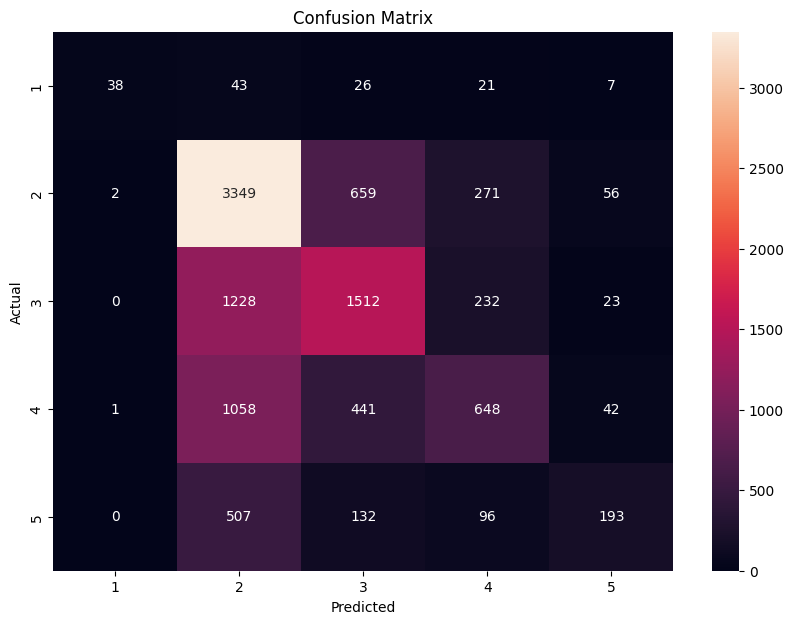

In [114]:
# 1. Prepare target - ensure string type and handle any missing values
y_clf = merged_df['VisitMode_x'].astype(str).fillna('Unknown')

# 2. Get unique classes and ensure they're strings
unique_classes = y_clf.unique()
print("Unique classes before encoding:", unique_classes)

# 3. Prepare features - drop unwanted columns
X_clf = merged_df.drop(
    columns=[
        'Rating',
        'VisitMode_x', 'VisitModeId', 'FrequentVisitMode',
        *[col for col in merged_df.columns if 'VisitModeProp_' in col],
        *[col for col in merged_df.columns if 'VisitMode_y_' in col],
        'CityName', 'Attraction', 'AttractionAddress'
    ]
)

# 4. Handle datetime columns
if 'VisitDate' in X_clf.columns:
    X_clf['VisitYear'] = X_clf['VisitDate'].dt.year
    X_clf['VisitMonth'] = X_clf['VisitDate'].dt.month
    X_clf = X_clf.drop('VisitDate', axis=1)

# 5. Convert remaining non-numeric columns
non_numeric = X_clf.select_dtypes(exclude=['number']).columns
if len(non_numeric) > 0:
    X_clf = pd.get_dummies(X_clf, columns=non_numeric)

# 6. Classification pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create and fit label encoder
le = LabelEncoder()
y_clf_encoded = le.fit_transform(y_clf)

# Get the original class names as strings
class_names = [str(cls) for cls in le.classes_]
print("\nEncoded classes:", list(zip(range(len(class_names)), class_names)))

# Train-test split
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf_encoded, test_size=0.2, random_state=42
)

# Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_clf, y_train_clf)

# Make predictions
y_pred_clf = clf.predict(X_test_clf)

# Generate classification report with proper string labels
print("\nClassification Report:")
print(classification_report(
    y_test_clf, 
    y_pred_clf, 
    target_names=class_names
))

# Print confusion matrix for better interpretation
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_clf, y_pred_clf)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

1. Advanced Class Imbalance Handling


In [117]:
from imblearn.ensemble import BalancedRandomForestClassifier

# Replace your current classifier with this
clf = BalancedRandomForestClassifier(
    random_state=42,
    n_estimators=200,
    max_depth=10,
    sampling_strategy='all',  # Resamples all classes to median
    replacement=True
)

2. Cost-Sensitive Learning


In [121]:
# Calculate class weights inversely proportional to class frequencies
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train_clf)
weights = compute_class_weight('balanced', classes=classes, y=y_train_clf)
class_weights = dict(zip(classes, weights))

clf = RandomForestClassifier(
    random_state=42,
    class_weight=class_weights,
    n_estimators=200,
    max_depth=10
)

3. Alternative Model Architectures


In [122]:
# Option 1: Gradient Boosting with focal loss (good for class imbalance)
from xgboost import XGBClassifier

from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Define a function to calculate class weights
def calculate_weights(y_train):
    classes = np.unique(y_train)
    weights = compute_class_weight('balanced', classes=classes, y=y_train)
    return dict(zip(classes, weights))

# Use the function to calculate weights
class_weights = calculate_weights(y_train_clf)

clf = XGBClassifier(
    objective='multi:softmax',
    num_class=len(class_names),
    scale_pos_weight=class_weights,  # Use calculated weights
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Option 2: Neural Network with class weights
# Install TensorFlow if not already installed
%pip install tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_clf.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(len(class_names), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Calculate class weights for Keras
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_clf), y=y_train_clf)
class_weight_dict = dict(enumerate(class_weights))

history = model.fit(
    X_train_clf, y_train_clf,
    epochs=50,
    batch_size=256,
    class_weight=class_weight_dict,
    validation_split=0.2
)

  You can safely remove it manually.
  You can safely remove it manually.


  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached rich-14.0.0-py3-none-any.whl.metadata (18 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/375.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/375.7 MB ? eta -:--:--
   ---------------------------------------- 0.5/375.7 MB 1.5 MB/s eta 0:04:07
   ---------------------------------------- 0.8/375.7 MB 1.5 MB/s eta 0:04:18
   ---------------------------------------- 1.0/375.7 MB 1.5 MB/s eta 0:04:13
   ---------------------------------------- 1.6/375.7 MB 1.6 MB/s eta 0:04:01
   ---------------------------------------- 1.8/375.7 MB 1.6 MB/s eta 0:03:55
   ---------------------------------------- 2.4/375.7 MB 1.7 MB/s eta 0:03:46
   ---------------------------------------- 2.9/375.7 MB 1.7 MB/s eta 0:03:38
   ---------------------------------------- 3.1/375.7 M

d:\Projects\Guvi_Project4\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2288 - loss: 384.0651 - val_accuracy: 0.4046 - val_loss: 1.6059
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2354 - loss: 1.6107 - val_accuracy: 0.4046 - val_loss: 1.6046
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3896 - loss: 1.6014 - val_accuracy: 0.0843 - val_loss: 1.6050
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3956 - loss: 1.6064 - val_accuracy: 0.0843 - val_loss: 1.6044
Epoch 5/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2615 - loss: 1.5976 - val_accuracy: 0.0843 - val_loss: 1.6036
Epoch 6/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1991 - loss: 1.5989 - val_accuracy: 0.4046 - val_loss: 1.6044
Epoch 7/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3346 - loss: 1.6034 - val_accuracy: 0.4046 - val_loss: 1.6043
Epoch 8/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2500 - loss: 1.6184 - val_accuracy: 

4. Threshold Adjustment for Rare Classes


In [125]:
from sklearn.calibration import calibration_curve
from sklearn.exceptions import NotFittedError

# Ensure the model is fitted or loaded
try:
    # Check if the model is already fitted
    y_probs = clf.predict_proba(X_test_clf)
except NotFittedError:
    # If not fitted, fit the model first
    clf.fit(X_train_clf, y_train_clf)
    y_probs = clf.predict_proba(X_test_clf)

# Adjust threshold for class '1' (encoded as 0)
adjusted_threshold = 0.3  # Default is 0.5
y_pred_adjusted = (y_probs[:, 0] > adjusted_threshold).astype(int)

# For multi-class, you'll need to implement custom thresholding
def predict_with_threshold(probs, thresholds):
    """Apply class-specific thresholds"""
    preds = np.argmax(probs, axis=1)
    for i, thresh in enumerate(thresholds):
        mask = probs[:, i] > thresh
        preds[mask] = i
    return preds

# Example thresholds - prioritize recall for rare classes
thresholds = [0.3, 0.5, 0.5, 0.5, 0.4]  # For classes 0-4 respectively
y_pred_thresholded = predict_with_threshold(y_probs, thresholds)

d:\Projects\Guvi_Project4\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [00:13:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


5. Ensemble of Different Sampling Strategies


In [128]:
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Create a pipeline with an imputer and the EasyEnsembleClassifier
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with the mean
    ('classifier', EasyEnsembleClassifier(
        n_estimators=10,
        random_state=42
    ))
])

# Fit the pipeline
pipeline.fit(X_train_clf, y_train_clf)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('classifier', EasyEnsembleClassifier(random_state=42))])

Evaluation Framework


Balanced Accuracy: 0.41247603853619597
Cohen's Kappa: 0.30547993363125747
              precision    recall  f1-score   support

           1       0.93      0.28      0.43       135
           2       0.54      0.77      0.64      4337
           3       0.55      0.50      0.52      2995
           4       0.51      0.30      0.37      2190
           5       0.60      0.21      0.31       928

    accuracy                           0.54     10585
   macro avg       0.63      0.41      0.46     10585
weighted avg       0.55      0.54      0.52     10585



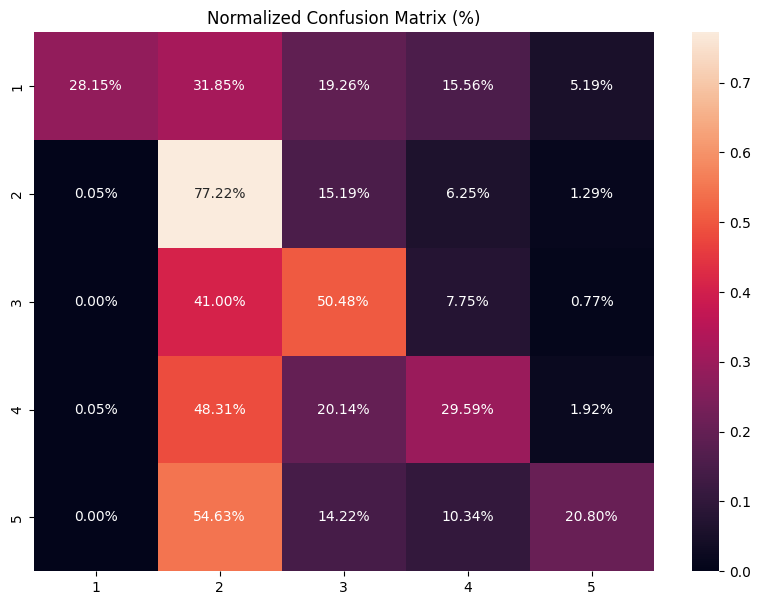

In [129]:
from sklearn.metrics import balanced_accuracy_score, cohen_kappa_score

# After getting predictions
print("Balanced Accuracy:", balanced_accuracy_score(y_test_clf, y_pred_clf))
print("Cohen's Kappa:", cohen_kappa_score(y_test_clf, y_pred_clf))

# Classification report with zero_division parameter
print(classification_report(
    y_test_clf,
    y_pred_clf,
    target_names=class_names,
    zero_division=0
))

# Confusion matrix with percentages
cm = confusion_matrix(y_test_clf, y_pred_clf)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 7))
sns.heatmap(cm_percent, annot=True, fmt='.2%',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Normalized Confusion Matrix (%)')
plt.show()